In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [5]:
wine = pd.read_csv('../data/white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


## EDA

We will be doing some EDA to check the target variabel distribution. The target variabel distribution is
1. (+) a good quality wine : quality > 6 (18.9%)
1. (-) a bad quality wine : quality <= 6 (81.1%)

You will find that the distribution is imbalanced with 18.9 % positive class and 81.1 % negative class. The minority class is the good quality one, we migh more interest to detect a wine with good quality than the common one.

In [7]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['label'] = np.where(wine['quality']>6,1,0)
wine['label'].value_counts(normalize=True)*100

0    81.153846
1    18.846154
Name: label, dtype: float64

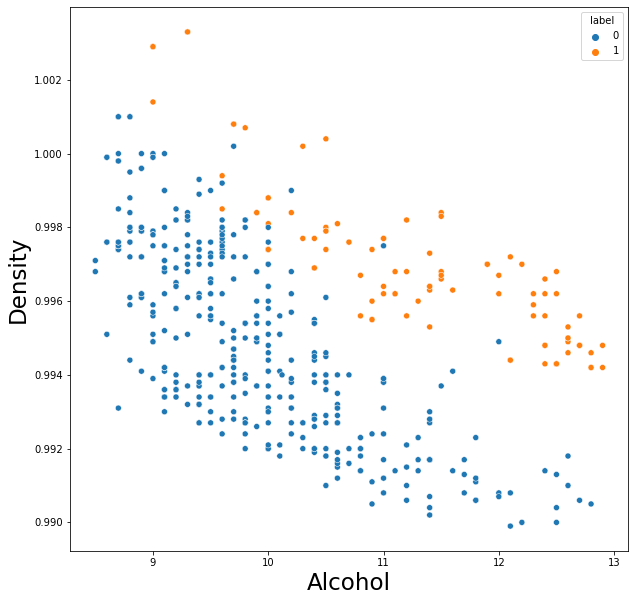

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'alcohol', y = 'density', data = wine, hue = 'label')
plt.xlabel('Alcohol', fontsize=23)
plt.ylabel('Density', fontsize=23)
plt.show()

## Data Splitting

In [11]:
X = wine[['density', 'alcohol']]
y = wine['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

## Model1 : Tanpa Polynomial

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = logreg.predict(X_test)
print('performance: \n', classification_report(y_test, y_pred))

performance: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



From illustration abovel, you can see the performance of the machine learning model. Let's say our concern is to these three metrics:
1. precision (+) : 0.69
1. recall (+) : 0.38
1. f1-score (+) : 0.49

<br>
next, we will do the modeling process with adding polynomial features and see the changes.

## Model2 : Dengan Polynomial

In [15]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
logreg_poly = LogisticRegression()
logreg_poly.fit(X_train_poly, y_train)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [19]:
y_pred_poly = logreg_poly.predict(X_test_poly)
print('performance \n:', classification_report(y_test, y_pred_poly))

performance 
:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



From illustration abovel, you can see the performance improvement of the machine learning model. The changes of the three metrics:
1. precision (+) : from 0.69 to 0.95
1. recall (+) : from 0.38 to 0.88
1. f1-score (+) : from 0.49 to 0.91

## Model3 : Resampling (RUS)

In [20]:
!pip install imblearn

In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [25]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train, y_train)

In [29]:
y_train.value_counts()

0    316
1     74
Name: label, dtype: int64

In [28]:
y_under.value_counts(

1    74
0    74
Name: label, dtype: int64

In [31]:
logreg_rus = LogisticRegression()
logreg_rus.fit(X_under, y_under)
y_pred_rus = logreg_rus.predict(X_test)
print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       106
           1       0.47      0.75      0.58        24

    accuracy                           0.80       130
   macro avg       0.70      0.78      0.72       130
weighted avg       0.85      0.80      0.82       130



In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



In [37]:
pipeline_logreg = Pipeline([
    ('polynom', PolynomialFeatures(degree=3)),
    ('clf', LogisticRegression())
])

In [38]:
from sklearn.model_selection import cross_validate, StratifiedKFold

logreg_cv = cross_validate(pipeline_logreg, X_train, y_train, scoring=['precision', 'recall', 'f1'],
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished


In [41]:
logreg_cv_df = pd.DataFrame(logreg_cv)
logreg_cv_df

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.118205,0.021938,1.000000,0.714286,0.833333
1,0.080782,0.035903,0.833333,0.666667,0.740741
2,0.069813,0.022939,0.900000,0.600000,0.720000
3,0.105718,0.019949,1.000000,0.400000,0.571429
4,0.078789,0.014961,1.000000,0.333333,0.500000


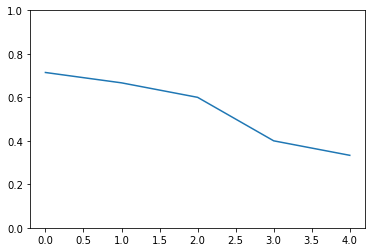

In [45]:
plt.plot(range(len(logreg_cv_df)), logreg_cv_df['test_recall'])
plt.ylim(0,1)
plt.show()

In [44]:
print('mean:', logreg_cv_df['test_recall'].mean())
print('std:', logreg_cv_df['test_recall'].std())

mean: 0.5428571428571429
std: 0.16754868653103983


In [46]:
pipeline_logreg_rus = Pipeline([
    ('resampling', rus),
    ('clf', LogisticRegression())
])

In [47]:
logreg_cv_rus = cross_validate(pipeline_logreg_rus, X_train, y_train, scoring=['precision', 'recall', 'f1'],
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [48]:
logreg_cv_rus

{'fit_time': array([0.03590631, 0.03391171, 0.06434751, 0.07431865, 0.07432032]),
 'score_time': array([0.01096797, 0.01196599, 0.0319159 , 0.01695442, 0.00798035]),
 'test_precision': array([0.39285714, 0.45833333, 0.46153846, 0.4       , 0.44444444]),
 'test_recall': array([0.78571429, 0.73333333, 0.8       , 0.66666667, 0.53333333]),
 'test_f1': array([0.52380952, 0.56410256, 0.58536585, 0.5       , 0.48484848])}

In [50]:
cv_rus_df = pd.DataFrame(logreg_cv_rus)
cv_rus_df

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.035906,0.010968,0.392857,0.785714,0.523810
1,0.033912,0.011966,0.458333,0.733333,0.564103
2,0.064348,0.031916,0.461538,0.800000,0.585366
3,0.074319,0.016954,0.400000,0.666667,0.500000
4,0.074320,0.007980,0.444444,0.533333,0.484848


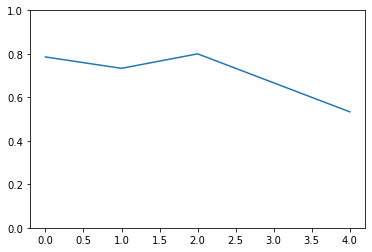

In [51]:
plt.plot(range(len(cv_rus_df)), cv_rus_df['test_recall'])
plt.ylim(0,1)
plt.show()

In [52]:
print('mean:', cv_rus_df['test_recall'].mean())
print('std:', cv_rus_df['test_recall'].std())

mean: 0.7038095238095237
std: 0.10871335752476965


## Model4 : Penalized

In [53]:
logreg_pen = LogisticRegression(class_weight='balanced')
logreg_pen.fit(X_train, y_train)
y_pred_pen = logreg_pen.predict(X_test)
print(classification_report(y_test, y_pred_pen))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       106
           1       0.43      0.83      0.57        24

    accuracy                           0.77       130
   macro avg       0.69      0.79      0.71       130
weighted avg       0.86      0.77      0.79       130



In [54]:
logreg_cv_pen = cross_validate(logreg_pen, X_train, y_train, scoring=['precision', 'recall', 'f1'],
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s finished


In [55]:
cv_pen = pd.DataFrame(logreg_cv_pen)
cv_pen

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.033909,0.012968,0.407407,0.785714,0.536585
1,0.050864,0.013964,0.423077,0.733333,0.536585
2,0.048870,0.019948,0.454545,0.666667,0.540541
3,0.082781,0.020943,0.400000,0.666667,0.500000
4,0.049866,0.021492,0.478261,0.733333,0.578947


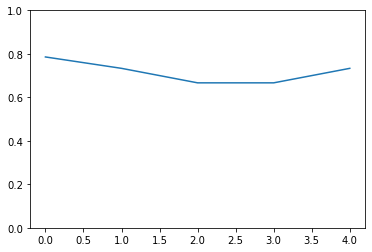

In [56]:
plt.plot(range(len(cv_pen)), cv_pen['test_recall'])
plt.ylim(0,1)
plt.show()

In [57]:
print('mean:', cv_pen['test_recall'].mean())
print('std:', cv_pen['test_recall'].std())

mean: 0.7171428571428571
std: 0.05079861086893177


## Model5 : SMOTE

In [59]:
smote = SMOTE()
logreg_smote = LogisticRegression()

logreg_smote_pipe = Pipeline([
    ('balancing', smote),
    ('clf', logreg_smote)])

In [62]:
logreg_cv_smo = cross_validate(logreg_smote_pipe, X_train, y_train, scoring=['precision', 'recall', 'f1'],
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [64]:
cv_smo_df = pd.DataFrame(logreg_cv_smo)
cv_smo_df

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.045876,0.011969,0.392857,0.785714,0.523810
1,0.071809,0.032912,0.423077,0.733333,0.536585
2,0.044883,0.019946,0.461538,0.800000,0.585366
3,0.057848,0.017950,0.454545,0.666667,0.540541
4,0.062832,0.025929,0.444444,0.533333,0.484848


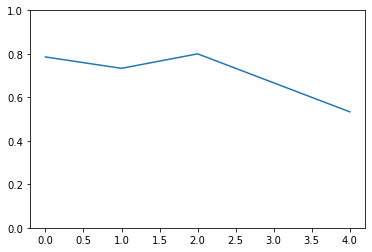

In [65]:
plt.plot(range(len(cv_smo_df)), cv_smo_df['test_recall'])
plt.ylim(0,1)
plt.show()

In [66]:
print('mean:', cv_smo_df['test_recall'].mean())
print('std:', cv_smo_df['test_recall'].std())

mean: 0.7038095238095237
std: 0.10871335752476965


## SMOTE Visualized

In [70]:
normal = pd.concat([X,y], axis=1)
normal

,density,alcohol,label
0,1.0010,8.800000,0
1,0.9940,9.500000,0
2,0.9951,10.100000,0
3,0.9956,9.900000,0
4,0.9956,9.900000,0
...,...,...,...
515,0.9926,10.400000,0
516,0.9934,9.100000,0
517,0.9920,10.400000,0
518,0.9918,10.800000,0


In [71]:
X_smo, y_smo = smote.fit_resample(X_train, y_train)
smo_df = pd.concat([X_smo, y_smo], axis=1)
smo_df

,density,alcohol,label
0,0.993600,9.100000,0
1,0.999800,8.700000,0
2,0.993400,9.700000,0
3,0.991000,12.600000,0
4,0.993100,10.600000,0
...,...,...,...
627,0.996628,11.500000,1
628,0.995708,10.929666,1
629,0.998164,9.923587,1
630,0.994878,12.153116,1


In [75]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
ros_df = pd.concat([X_ros, y_ros], axis=1)
ros_df

,density,alcohol,label
0,0.9936,9.1,0
1,0.9998,8.7,0
2,0.9934,9.7,0
3,0.9910,12.6,0
4,0.9931,10.6,0
...,...,...,...
627,0.9970,11.9,1
628,0.9942,12.9,1
629,0.9956,12.4,1
630,1.0008,9.7,1


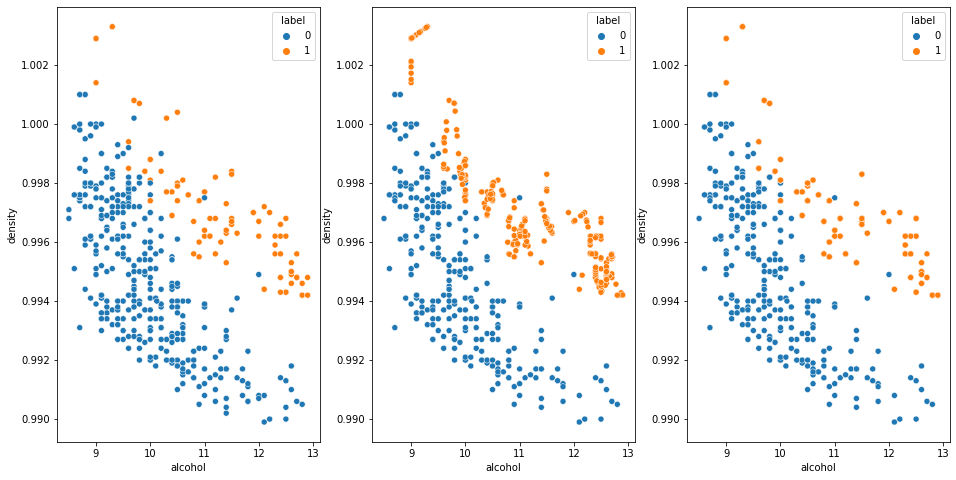

In [79]:
plt.figure(figsize=(16,8))
plt.subplot(131)
sns.scatterplot(x='alcohol', y='density', hue='label', data=normal)
plt.subplot(132)
sns.scatterplot(x='alcohol', y='density', hue='label', data=smo_df)
plt.subplot(133)
sns.scatterplot(x='alcohol', y='density', hue='label', data=ros_df)
plt.show()

# Combine Hyperparameter Tuning with Balancing Method

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [84]:
smote = SMOTE()
model = LogisticRegression()
estimator = Pipeline([('balancing', smote), ('clf', model)])

hyperparam_space = {
    'balancing__k_neighbors': [2,5,10,15,20],
    'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver': ['liblinear', 'newton-cg']
}

skf = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = skf,
    scoring = 'f1',
    n_jobs=-1,
    verbose=1
)

In [85]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='f1', verbose=1)

In [81]:
estimator.get_params()

{'memory': None,
 'steps': [('balancing', SMOTE()), ('clf', LogisticRegression())],
 'verbose': False,
 'balancing': SMOTE(),
 'clf': LogisticRegression(),
 'balancing__k_neighbors': 5,
 'balancing__n_jobs': None,
 'balancing__random_state': None,
 'balancing__sampling_strategy': 'auto',
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__l1_ratio': None,
 'clf__max_iter': 100,
 'clf__multi_class': 'auto',
 'clf__n_jobs': None,
 'clf__penalty': 'l2',
 'clf__random_state': None,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [ ]:
LogisticRegression()

In [86]:
print('best score', grid_search.best_score_)
print('best params', grid_search.best_params_)

best score 0.5829613119728653
best params {'balancing__k_neighbors': 20, 'clf__C': 100, 'clf__solver': 'newton-cg'}


In [87]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balancing__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.042976,0.018608,0.024772,0.012881,2,100,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.536585,0.536585,0.555556,0.512821,0.611111,0.550532,0.033185,8
1,0.168387,0.041884,0.011978,0.003852,2,100,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.536585,0.578947,0.594595,0.571429,0.611111,0.578533,0.025018,2
2,0.038480,0.011449,0.010878,0.003233,2,10,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.536585,0.536585,0.540541,0.500000,0.578947,0.538532,0.025019,19
3,0.074809,0.007975,0.010170,0.005478,2,10,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.536585,0.536585,0.540541,0.500000,0.578947,0.538532,0.025019,19
4,0.038694,0.009617,0.008776,0.001596,2,1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.523810,0.536585,0.540541,0.500000,0.578947,0.535977,0.025730,26
5,0.090358,0.014584,0.014362,0.010414,2,1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.523810,0.536585,0.555556,0.540541,0.578947,0.547088,0.018877,14
6,0.049674,0.021112,0.008281,0.001593,2,0.1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.510638,0.458333,0.521739,0.523810,0.511628,0.505230,0.024030,46
7,0.082581,0.011875,0.014562,0.008453,2,0.1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.523810,0.536585,0.540541,0.540541,0.578947,0.544085,0.018482,17
8,0.024536,0.005377,0.008177,0.002030,2,0.01,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.304348,0.322581,0.322581,0.322581,0.322581,0.318934,0.007293,51
9,0.085173,0.013300,0.007580,0.001850,2,0.01,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.536585,0.564103,0.540541,0.540541,0.484848,0.533323,0.026123,29


## Model Performance Comparison

In [89]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       106
           1       0.50      0.83      0.62        24

    accuracy                           0.82       130
   macro avg       0.73      0.82      0.75       130
weighted avg       0.87      0.82      0.83       130



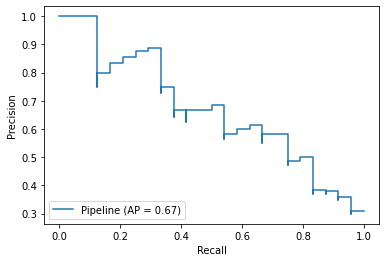

In [93]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(estimator, X_test, y_test)

In [90]:
estimator_tuned = grid_search.best_estimator_.fit(X_train, y_train)
y_pred_tuned = estimator_tuned.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       106
           1       0.50      0.83      0.62        24

    accuracy                           0.82       130
   macro avg       0.73      0.82      0.75       130
weighted avg       0.87      0.82      0.83       130



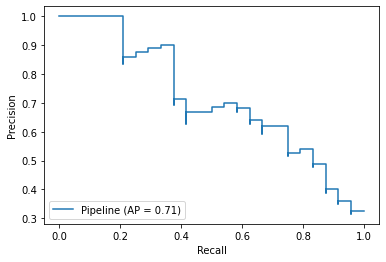

In [94]:
plot_precision_recall_curve(estimator_tuned, X_test, y_test)